In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../day_42/placement.csv")

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
361,6.37,37.0,1
902,7.03,42.0,1
628,7.12,9.0,0
471,5.48,18.0,0
59,7.70,32.0,1


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

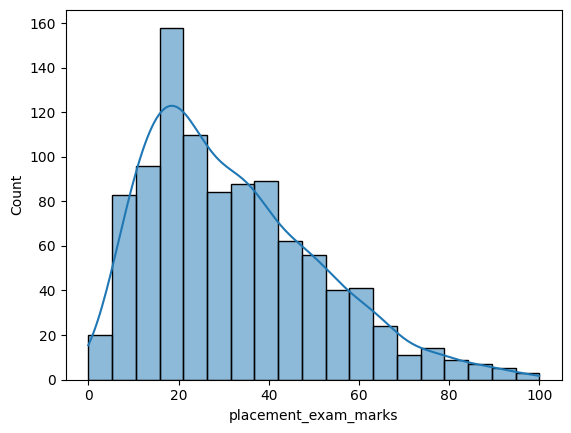

In [6]:
sns.histplot(df['placement_exam_marks'],kde=True)

## Data is Left Skewed

## We will perform Interquartile Range method to detect outlier

<Axes: ylabel='placement_exam_marks'>

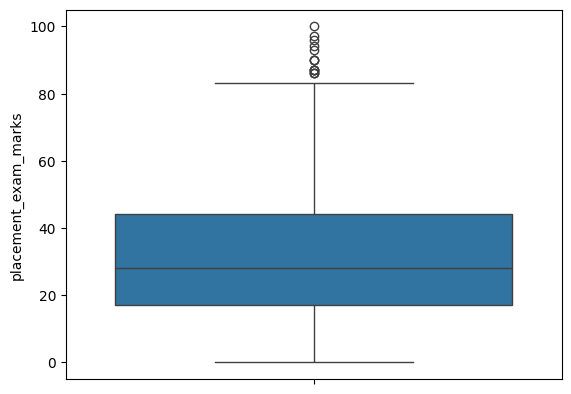

In [7]:
sns.boxplot(df['placement_exam_marks'])

In [8]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [9]:
iqr = percentile75 -percentile25

max_value = percentile75 + 1.5 * iqr
min_value = percentile25 - 1.5 * iqr



## Treating the outlier

# 1. Trimming

In [12]:
new_df = df[(df['placement_exam_marks']< max_value) & (df['placement_exam_marks'] >min_value)]

In [13]:
print(df.shape)
print(new_df.shape)

(1000, 3)
(985, 3)


In [15]:
new_df.sample(5)

,cgpa,placement_exam_marks,placed
87,6.96,19.0,1
282,6.43,44.0,1
292,5.82,41.0,0
0,7.19,26.0,1
624,7.35,80.0,1


<Axes: ylabel='placement_exam_marks'>

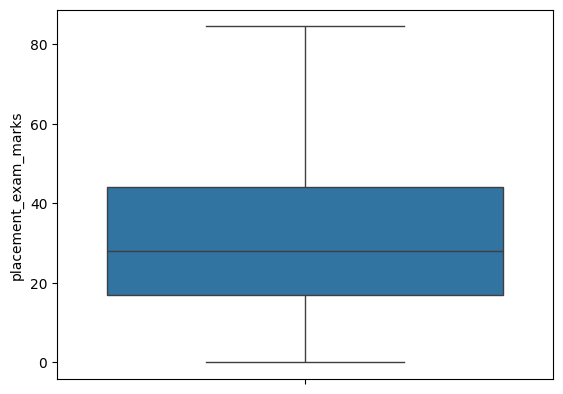

In [19]:
sns.boxplot(df['placement_exam_marks'])

# 2. Capping

In [16]:
df['placement_exam_marks'] = np.where(df['placement_exam_marks']>max_value,max_value,np.where(df['placement_exam_marks']<min_value,min_value,df['placement_exam_marks'])) 

In [17]:
df.sample(5)

,cgpa,placement_exam_marks,placed
575,7.55,16.0,0
713,7.80,24.0,0
572,7.66,37.0,1
674,6.73,31.0,1
992,6.26,12.0,0


<Axes: ylabel='placement_exam_marks'>

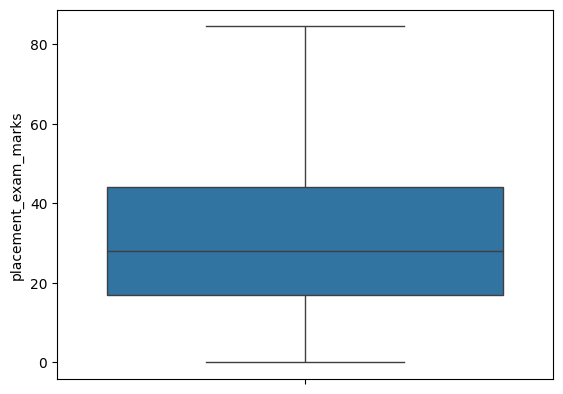

In [18]:
sns.boxplot(df['placement_exam_marks'])